# Introduction
What is the Iris dataset?

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) based on certain characteristics.
The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import dill

# Acquire And Prepare Data
- Get data from source
- Perform data preparation (cleansing, imputation, feature engineering, encoding, etc)
- Split data into train and test sets.

In [2]:
X, y = load_iris(return_X_y=True, as_frame=True)

y = [
    "Setosa" if v == 0 else "Versicolour" if v == 1 else "Virginica"
    for v in y
]

In [3]:
X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y = pd.Series(y)
print(y.sample(5))

2           Setosa
93     Versicolour
1           Setosa
5           Setosa
110      Virginica
dtype: object


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True, stratify=y)

# Train Model
- Determine the type of problem (classification, regression, clustering, dimension reduction, etc)
- Select and train a model

In [6]:
y_train.value_counts()

Versicolour    40
Setosa         40
Virginica      40
Name: count, dtype: int64

In [7]:
classifier = RandomForestClassifier()
classifier.fit(X=X_train, y=y_train)

RandomForestClassifier()

# Test Model
Key Activities:
- Test if the model works as expected

In [8]:
classifier.predict(X=X_test)

array(['Versicolour', 'Setosa', 'Virginica', 'Virginica', 'Setosa',
       'Setosa', 'Virginica', 'Versicolour', 'Versicolour', 'Setosa',
       'Setosa', 'Virginica', 'Virginica', 'Versicolour', 'Virginica',
       'Versicolour', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Virginica', 'Virginica', 'Versicolour', 'Virginica', 'Virginica',
       'Versicolour', 'Versicolour', 'Versicolour', 'Versicolour'],
      dtype=object)

In [9]:
pd.DataFrame(classifier.predict_proba(X=X_test), columns=classifier.classes_)

,Setosa,Versicolour,Virginica
0,0.00,1.00,0.00
1,1.00,0.00,0.00
2,0.00,0.00,1.00
3,0.00,0.02,0.98
4,1.00,0.00,0.00
5,1.00,0.00,0.00
6,0.00,0.00,1.00
7,0.00,0.50,0.50
8,0.00,0.54,0.46
9,1.00,0.00,0.00


# Evaluate Model
- Evaluate the accuracy of the model using an appropriate metric
- Decide whether or not to use the model for production

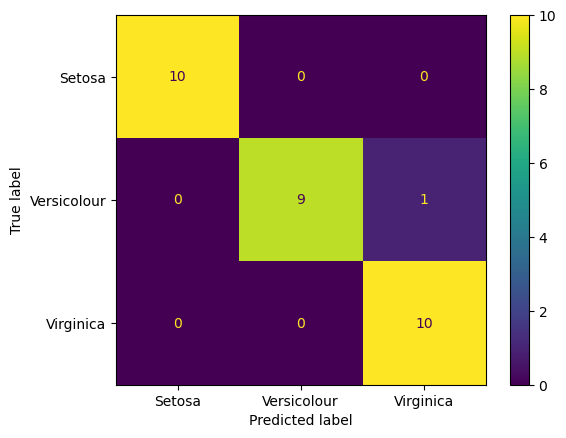

In [14]:
cm = confusion_matrix(y_true=y_test, y_pred=classifier.predict(X=X_test))

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, 
    display_labels=classifier.classes_
    )

disp.plot()

# Deploy Model
- Save model to disk
- Build an API to serve the model
- Test the API

In [10]:
with open("model.bin", mode="wb") as f:
    dill.dump(classifier, f)

In [16]:
type(classifier)

sklearn.ensemble._forest.RandomForestClassifier